# Multiple Linear Regression

##### Boston Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"E:\PYTHON\python Datasets\Boston1.csv")

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
from pandas_profiling import ProfileReport
Report=ProfileReport(data)
Report.to_file(output_file='BostonReport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


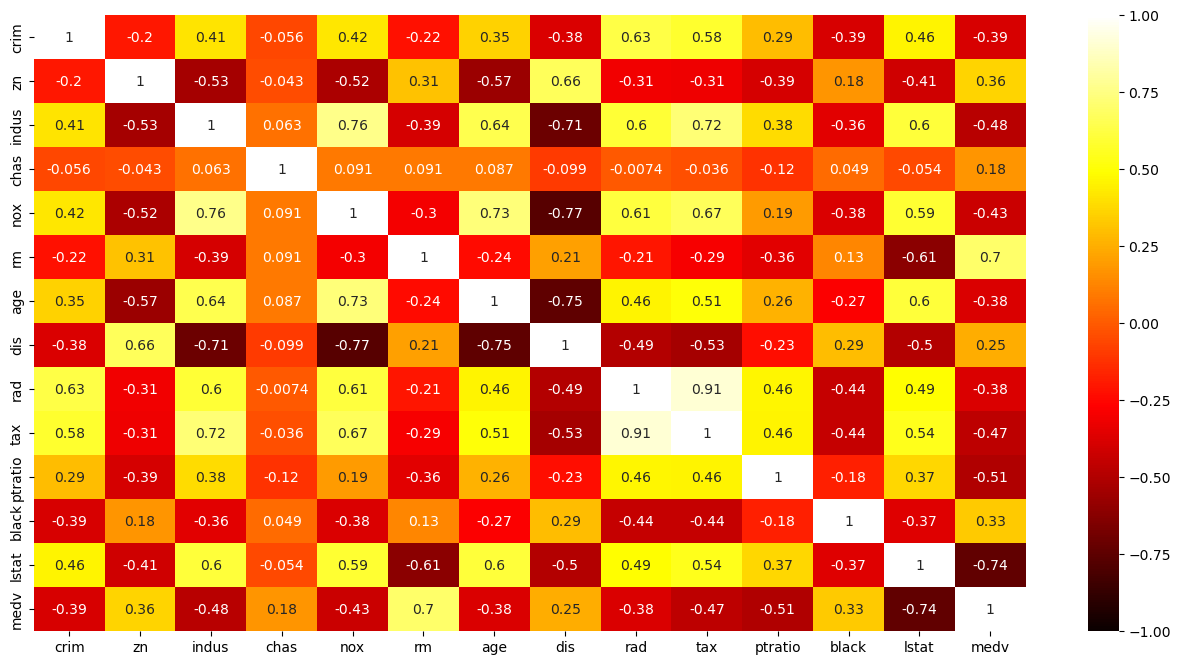

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap='hot',vmin=-1,vmax=1)
plt.show()

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

df = data.iloc[:,:]

result_df = pd.DataFrame(columns=['column_name', 'score'])

# Loop over all columns in the dataframe
for col_name in df.columns:
    X = df[[col_name]]
    y = df['medv']

    # Apply univariate feature selection to the current column
    selector = SelectKBest(score_func=f_regression, k=1)
    selector.fit(X, y)

    # Get the score of the selected feature
    score = selector.scores_[0]

    result_df = result_df.append({'column_name': col_name, 'score': score}, ignore_index=True)

result_df = result_df.sort_values(by='score', ascending=False)

C:\Users\Nithin\AppData\Local\Temp\ipykernel_15416\2858407729.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': col_name, 'score': score}, ignore_index=True)
C:\Users\Nithin\AppData\Local\Temp\ipykernel_15416\2858407729.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': col_name, 'score': score}, ignore_index=True)
C:\Users\Nithin\AppData\Local\Temp\ipykernel_15416\2858407729.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': col_name, 'score': score}, ignore_index=True)
C:\Users\Nithin\AppData\Local\Temp\ipykernel_15416\2858407729.py:23: FutureWarning: The frame.append method is depr

In [8]:
result_df

,column_name,score
13,medv,3.242592e+17
12,lstat,6.016179e+02
5,rm,4.718467e+02
10,ptratio,1.751055e+02
2,indus,1.539549e+02
9,tax,1.417614e+02
4,nox,1.125915e+02
0,crim,8.948611e+01
8,rad,8.591428e+01
6,age,8.347746e+01


In [9]:
data.drop(columns=['dis','chas'],inplace=True)

#### separating independent and dependent Variables

In [10]:
y=data.medv
x=data.drop('medv',axis=1)

##### removeing columns with the highest VIF

In [11]:
len(data.columns)

12

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, thresh=6.0):
    """
    This function calculates and removes the columns with high Variance Inflation Factor (VIF) values in a dataframe.

    Parameters:
        df (pandas.DataFrame): The input dataframe.
        thresh (float): The threshold for the VIF values (default is 5.0).

    Returns:
        pandas.DataFrame: The input dataframe with the columns having VIF values greater than the threshold removed.
    """
    dropped = True
    while dropped:
        variables = df.columns
        dropped = False
        vif = [variance_inflation_factor(df[variables].values, df.columns.get_loc(var)) for var in variables]
        
        max_vif = max(vif)
        if max_vif > thresh:
            max_vif_index = vif.index(max_vif)
            df = df.drop(variables[max_vif_index], axis=1)
            dropped = True
            
    return df
# Calculate VIF and remove columns
df_vif = calculate_vif(x) 

In [13]:
df_vif.columns

Index(['crim', 'zn', 'rad', 'black', 'lstat'], dtype='object')

In [14]:
len(df_vif.columns)

5

1.The columns in df_vif are those without high VIF. To reduce multicollinearity, remove these columns from the original dataframe

In [15]:
x.drop(columns=df_vif,axis=1,inplace=True)

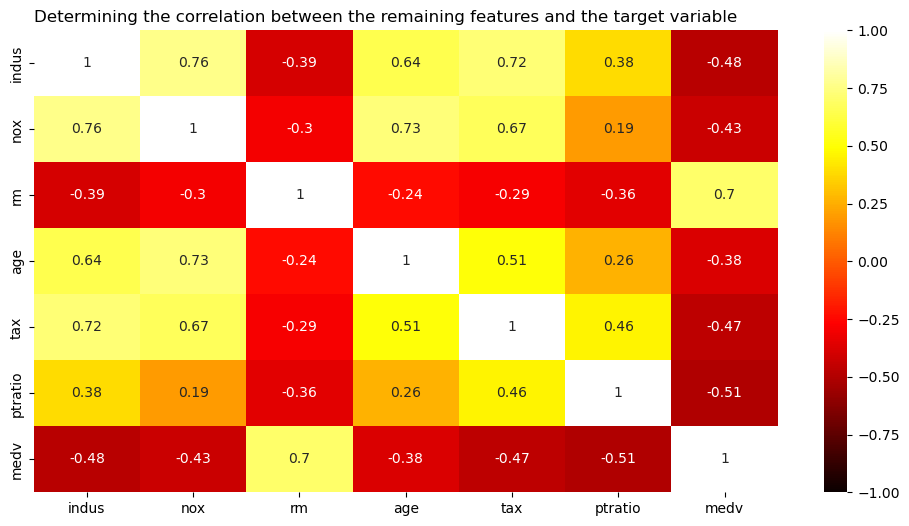

In [16]:
new_pd=pd.concat([x, y], axis=1)

plt.figure(figsize=(12,6))
sns.heatmap(new_pd.corr(),annot=True,cmap='hot',vmin=-1,vmax=1)
plt.title('Determining the correlation between the remaining features and the target variable',c='k',loc='left')
plt.show()

In [17]:
x.head()

,indus,nox,rm,age,tax,ptratio
0,2.31,0.538,6.575,65.2,296,15.3
1,7.07,0.469,6.421,78.9,242,17.8
2,7.07,0.469,7.185,61.1,242,17.8
3,2.18,0.458,6.998,45.8,222,18.7
4,2.18,0.458,7.147,54.2,222,18.7


In [20]:
y=pd.DataFrame(y)
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### trin test

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)

### Linear Model

In [22]:
from sklearn.linear_model import LinearRegression
house_price=LinearRegression()

#traing the model
house_price.fit(x_train,y_train)
#predicting
y_pred=house_price.predict(x_test)

In [24]:
from sklearn import metrics
print(f"Mean Abslote Error : {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R^2 : {metrics.r2_score(y_test,y_pred)}")

Mean Abslote Error : 3.596889731432939
Mean Squared Error : 21.893957467499668
Root Mean Squared Error : 4.679097933095616
R^2 : 0.7168810069660558


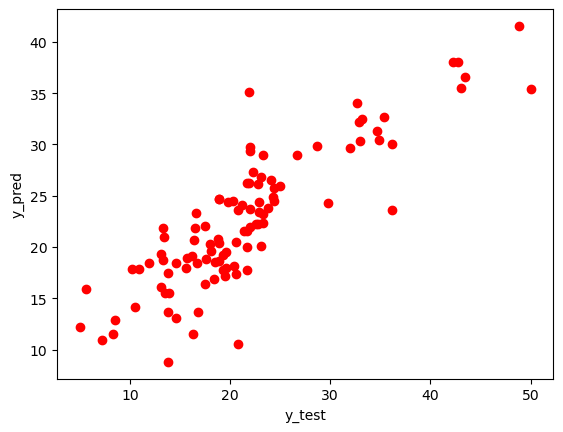

In [26]:
plt.scatter(y_test,y_pred,c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

This model provides higher accuracy and lower error (MSE, RMSE) compared to simple linear regression.